In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification,make_regression
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import sklearn
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circl

In [ ]:
data=make_classification(200,4,random_state=1)
data
x=data[0]
y=data[1]

In [ ]:
model=Sequential()
model.add(Dense(1135,activation='tanh',input_dim=4))
model.add(Dense(624,activation='relu'))
model.add(Dense(114,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
adam=Adam(0.001)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1135)              5675      
                                                                 
 dense_1 (Dense)             (None, 624)               708864    
                                                                 
 dense_2 (Dense)             (None, 114)               71250     
                                                                 
 dense_3 (Dense)             (None, 1)                 115       
                                                                 
Total params: 785,904
Trainable params: 785,904
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
32/32 [==============================] - 2s 23ms/step - loss: 0.4534 - accuracy: 0.8375 - val_loss: 0.3238 - val_accuracy: 0.9000
Epoch 2/150
32/32 [================

<Axes: xlabel='index'>

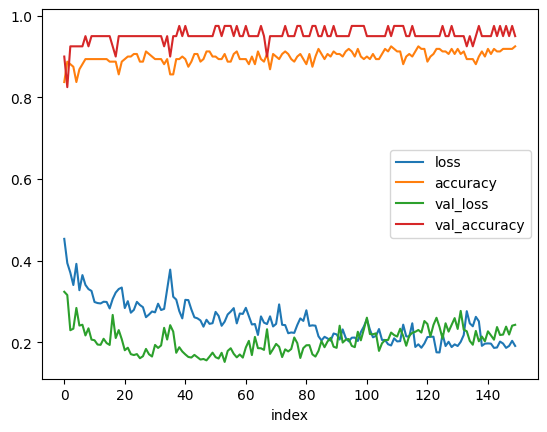

In [ ]:

model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())
history=model.fit(x,y,epochs=150,batch_size=5,validation_split=0.2)
pd.DataFrame(model.history.history).reset_index().plot('index',kind='line')

In [ ]:
data=make_regression(200,4,random_state=1)
x=data[0]
y=data[1]
from keras import backend as k

In [ ]:
def r2(y_true,y_pred):
  ss_res=k.sum(k.square(y_true-y_pred))
  ss_tot=k.sum(k.square(y_true-k.mean(y_true)))
  return(1-ss_res/(ss_tot))

In [ ]:
model=Sequential()
model.add(Dense(1135,activation='tanh',input_dim=4))
model.add(Dense(624,activation='relu'))
model.add(Dense(114))
model.add(Dense(1))
adam=Adam(0.0001)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1135)              5675      
                                                                 
 dense_17 (Dense)            (None, 624)               708864    
                                                                 
 dense_18 (Dense)            (None, 114)               71250     
                                                                 
 dense_19 (Dense)            (None, 1)                 115       
                                                                 
Total params: 785,904
Trainable params: 785,904
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
32/32 [==============================] - 2s 26ms/step - loss: 11075.1445 - r2: -0.3001 - val_loss: 15078.8594 - val_r2: -0.1304
Epoch 2/150
32/32 [================

<Axes: xlabel='index'>

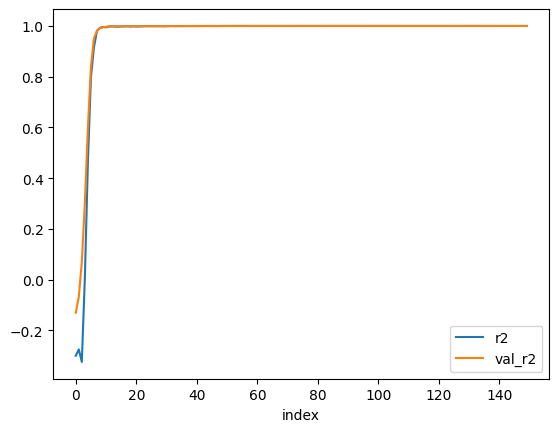

In [ ]:
model.compile(optimizer=adam,loss='mean_squared_error',metrics=[r2])
print(model.summary())
history = model.fit(x,y,epochs=150, batch_size=5, validation_split=0.2)
pd.DataFrame(model.history.history)[['r2','val_r2']].reset_index().plot('index',kind='line')

In [ ]:
data=pd.DataFrame(history.history)
data.loc[data['r2'].idxmax()]

loss        0.284457
r2          0.999973
val_loss    3.580691
val_r2      0.999856
Name: 83, dtype: float64